# 🌋 Expanded Symbolic Analysis of Synthetic Volcanic Signals
This notebook enhances the synthetic signal generation used to simulate symbolic buildup before eruptions. It introduces extended signal lengths, multiple motif types, and composite symbolic scoring.

In [1]:

!pip install pandas numpy matplotlib --quiet


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def symbolic_entropy(series):
    counts = np.bincount(series)
    probs = counts / np.sum(counts)
    return -np.sum([p * np.log2(p) for p in probs if p > 0])

def detect_phi_motifs(bits, motif="01001010"):
    bit_str = ''.join(map(str, bits))
    return sum(1 for i in range(len(bit_str) - len(motif) + 1) if bit_str[i:i+len(motif)] == motif)

def detect_multiple_motifs(bits, motifs):
    bit_str = ''.join(map(str, bits))
    return {motif: sum(1 for i in range(len(bit_str) - len(motif) + 1) if bit_str[i:i+len(motif)] == motif) for motif in motifs}

def count_prime_intervals(bits, max_n=100):
    primes = set(n for n in range(2, max_n + 1) if all(n % d != 0 for d in range(2, int(n**0.5) + 1)))
    return sum((i+1) in primes for i, b in enumerate(bits) if b == 1)


In [3]:

np.random.seed(42)

# Simulate multiple synthetic events
events = ["Event " + str(i+1) for i in range(10)]
motif_list = ["01001010", "00110011", "111000111", "10101010"]

results = []

for event in events:
    bits = np.random.choice([0, 1], size=300, p=[0.51, 0.49])
    entropy = symbolic_entropy(bits)
    motif_counts = detect_multiple_motifs(bits, motif_list)
    total_motifs = sum(motif_counts.values())
    primes = count_prime_intervals(bits, max_n=300)

    results.append({
        "event": event,
        "entropy": entropy,
        "φ_motifs": motif_counts["01001010"],
        "alt_motifs_total": total_motifs - motif_counts["01001010"],
        "prime_intervals": primes
    })

df = pd.DataFrame(results)
df


,event,entropy,φ_motifs,alt_motifs_total,prime_intervals
0,Event 1,0.999872,2,3,31
1,Event 2,0.999487,2,3,30
2,Event 3,0.991777,1,2,24
3,Event 4,0.996792,4,2,31
4,Event 5,0.999487,4,2,28
5,Event 6,0.999198,1,3,30
6,Event 7,0.999711,1,6,31
7,Event 8,0.999968,1,1,32
8,Event 9,0.996792,2,4,27
9,Event 10,1.000000,2,2,39


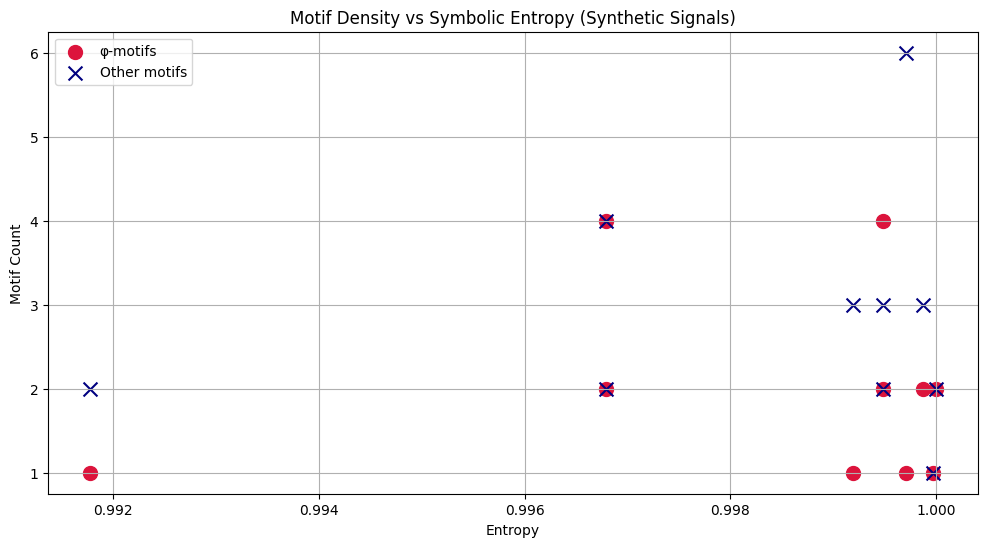

In [4]:

plt.figure(figsize=(12, 6))
plt.scatter(df["entropy"], df["φ_motifs"], s=100, c='crimson', label="φ-motifs")
plt.scatter(df["entropy"], df["alt_motifs_total"], s=100, c='navy', label="Other motifs", marker='x')
plt.xlabel("Entropy")
plt.ylabel("Motif Count")
plt.title("Motif Density vs Symbolic Entropy (Synthetic Signals)")
plt.grid(True)
plt.legend()
plt.show()
